In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data=load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
print ("feature names of data: \n")
print (data.feature_names)

feature names of data: 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print ("Sample counts: \n")
print(df['target'].value_counts().rename(index={0:'malignant', 1:'benign'}))

Sample counts: 

target
benign       357
malignant    212
Name: count, dtype: int64


In [ ]:
print("\n statistical analysis of data: \n")
print(df.describe())


 statistical analysis of data: 

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000

In [ ]:
#Correlation matrix
Correlation_matrix = df.corr()
print(Correlation_matrix["target"].sort_values(ascending=False))

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

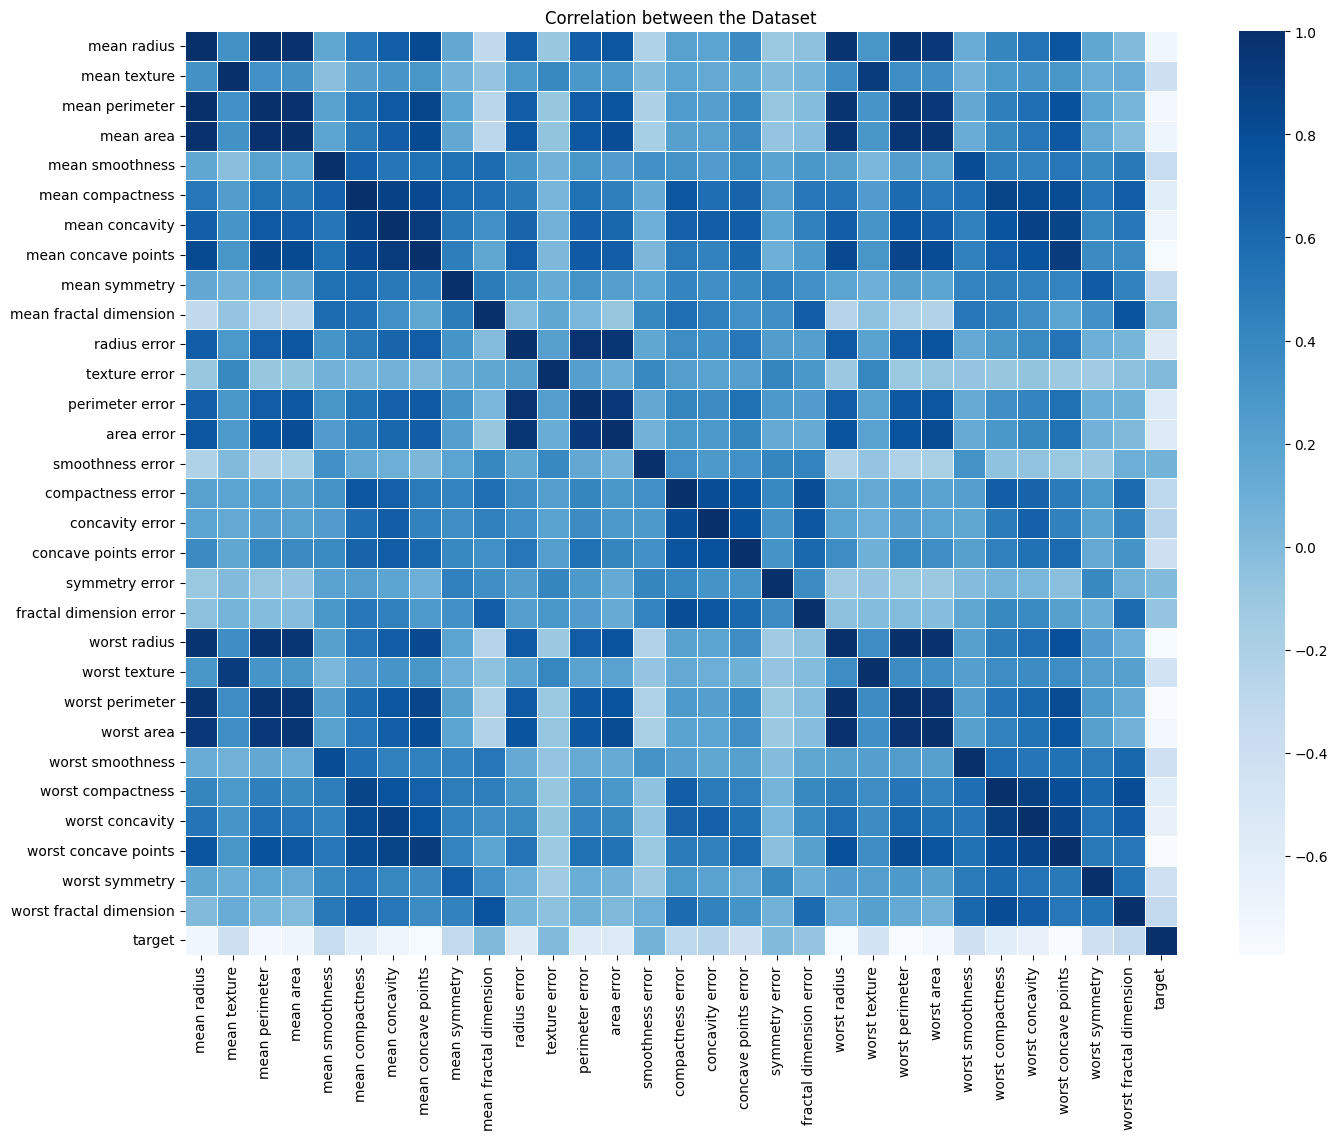

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap='Blues',linewidths=0.4)
plt.title("Correlation between the Dataset")
plt.show()

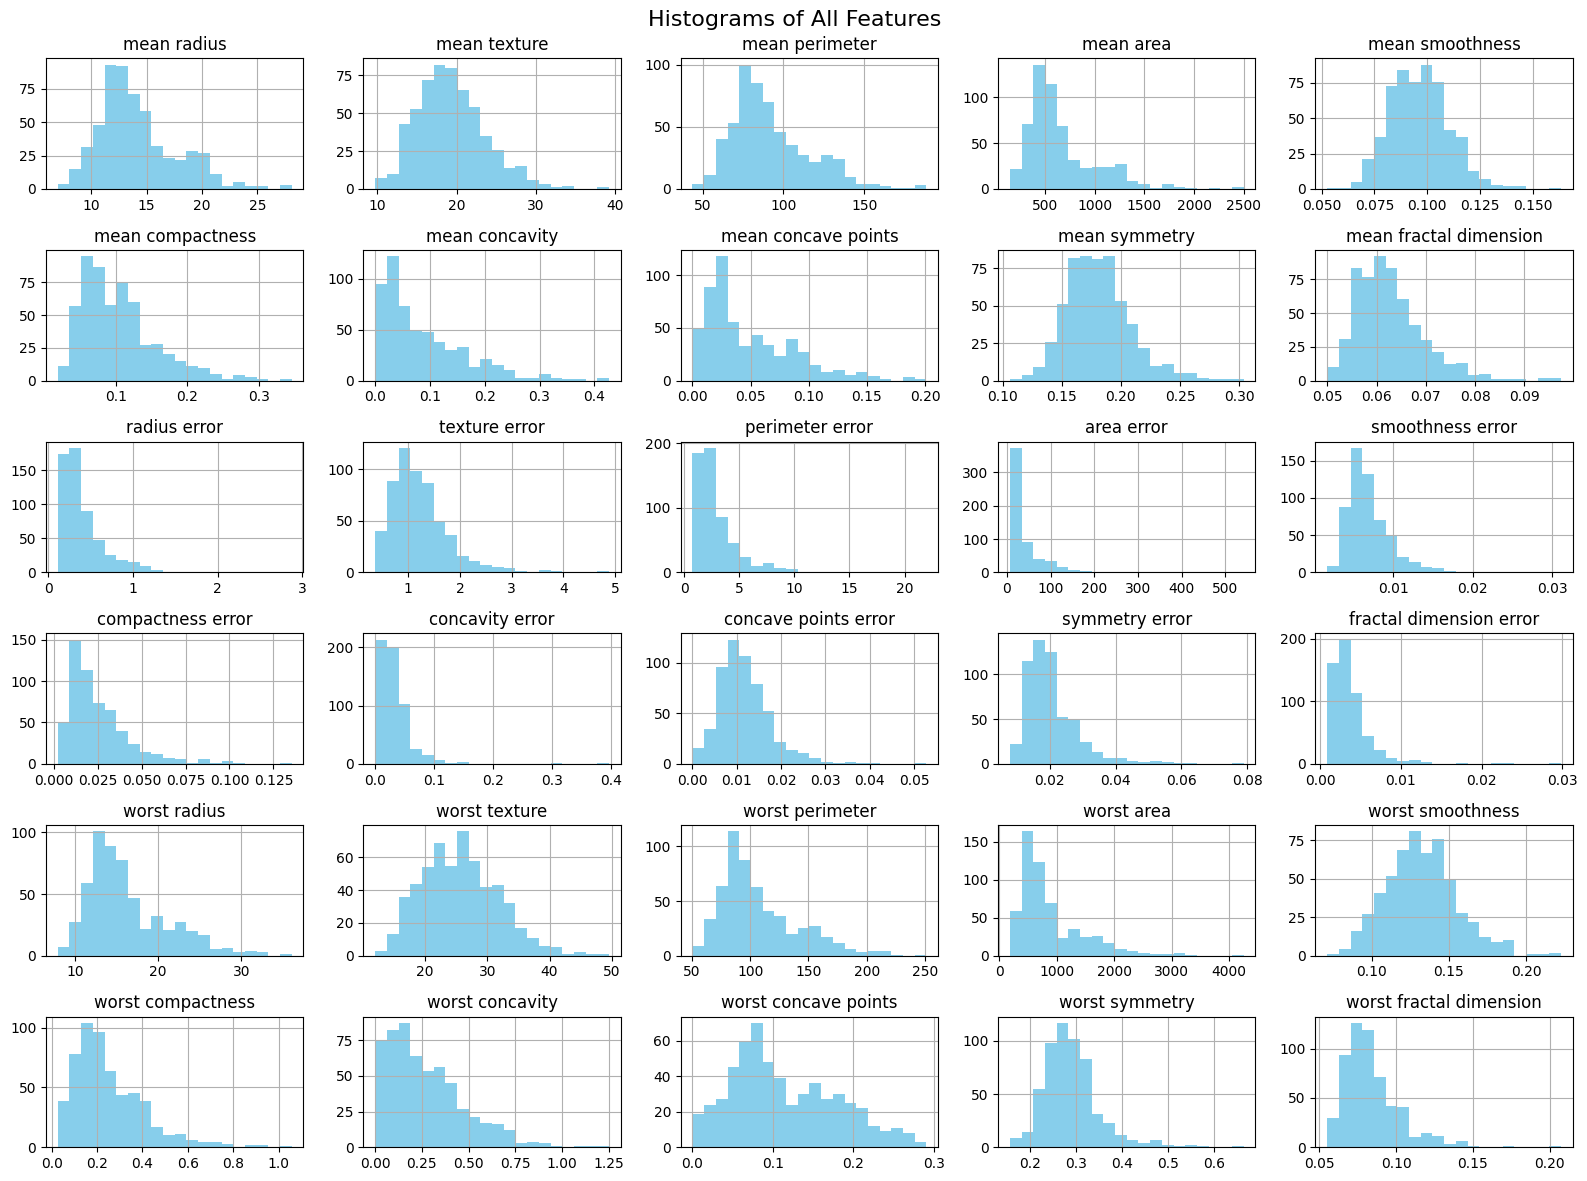

In [ ]:
df.drop('target', axis=1).hist(bins=20, figsize=(16, 12), color='skyblue')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Visualize histogram, boxplot and scatterplot for selected features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']


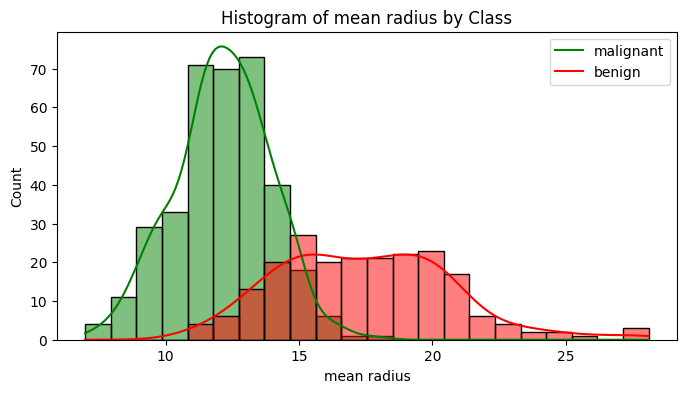

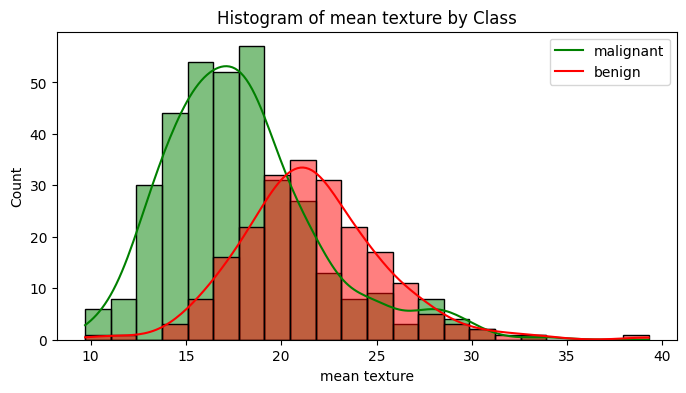

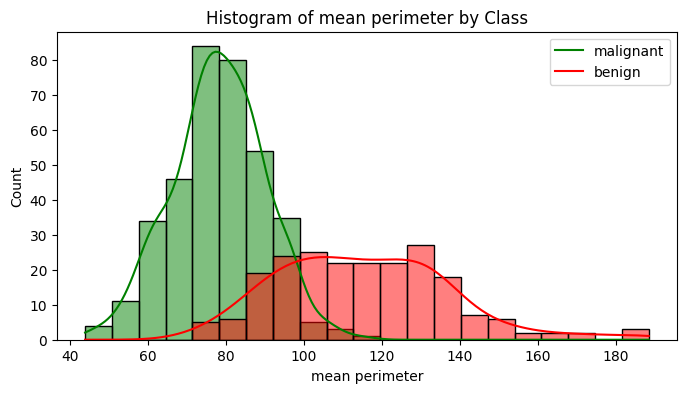

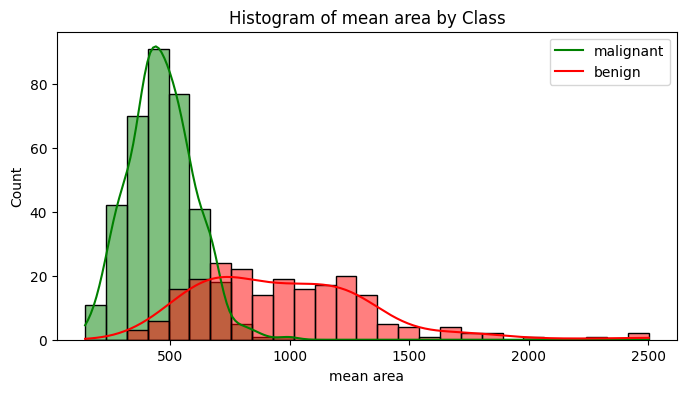

In [ ]:
# Histograms by class
for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=feature, hue='target', kde=True, palette=['red', 'green'], alpha=0.5)
    plt.title(f"Histogram of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(labels=data.target_names)
    plt.show()

/tmp/ipython-input-11-597594821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette=['red', 'green'])


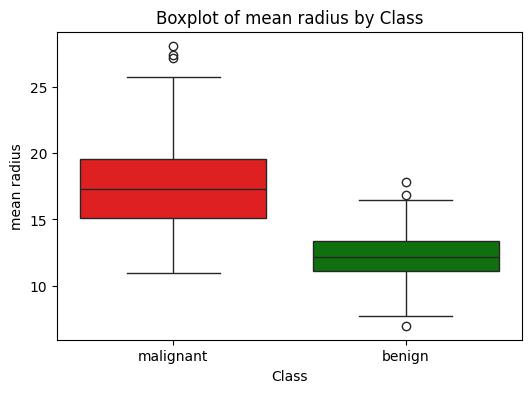

/tmp/ipython-input-11-597594821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette=['red', 'green'])


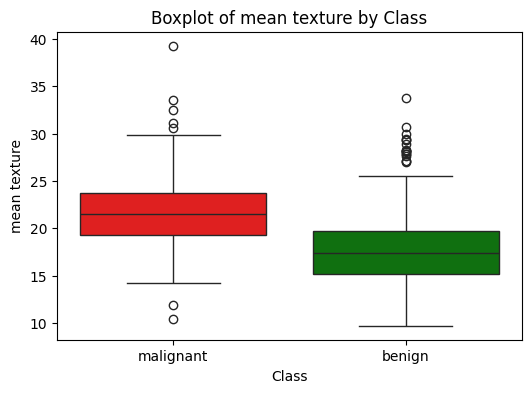

/tmp/ipython-input-11-597594821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette=['red', 'green'])


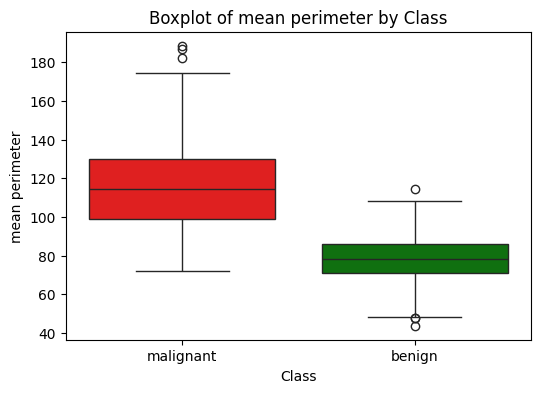

/tmp/ipython-input-11-597594821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette=['red', 'green'])


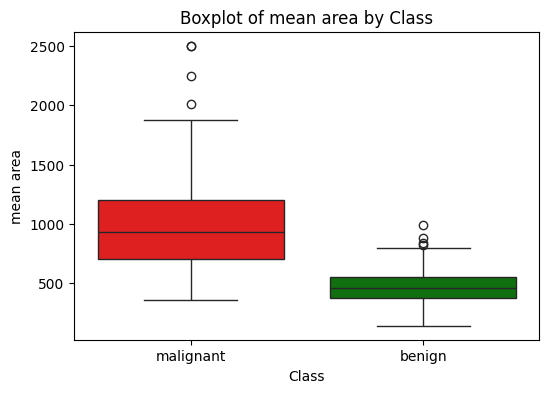

In [ ]:
# Boxplots by class
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=feature, data=df, palette=['red', 'green'])
    plt.xticks(ticks=[0,1], labels=data.target_names)
    plt.title(f"Boxplot of {feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)
    plt.show()

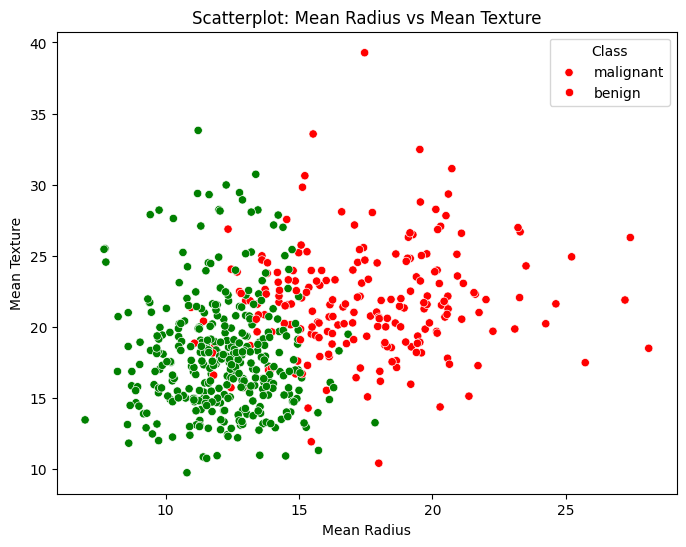

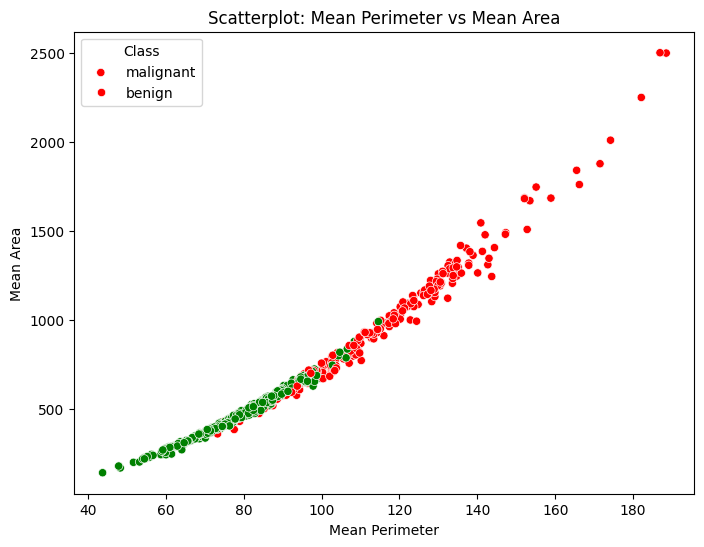

In [ ]:
# Scatterplots of feature pairs colored by class
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target', palette=['red', 'green'])
plt.title("Scatterplot: Mean Radius vs Mean Texture")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend(title='Class', labels=data.target_names)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mean perimeter', y='mean area', hue='target', palette=['red', 'green'])
plt.title("Scatterplot: Mean Perimeter vs Mean Area")
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Area")
plt.legend(title='Class', labels=data.target_names)
plt.show()

In [ ]:
# Load the dataset
data = load_breast_cancer()
X = data.data                  # Features
y = data.target                # Target: 0 = Malignant, 1 = Benign

In [ ]:
#Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def initialize_parameters(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

In [ ]:
def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    return A

In [ ]:
def backward_propagation(X, A, y):
    m = X.shape[0]
    dW = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        A = forward_propagation(X, w, b)
        cost = compute_cost(A, Y)
        grads = backward_propagation(X, A, Y)
        w = w - learning_rate * grads["dW"]
        b = b - learning_rate * grads["db"]
        if i % 100 == 0:
            costs.append(cost)
    return w, b, costs

In [ ]:
def predict(x, w, b):
    m = x.shape[0]
    y_pred = np.zeros((m, 1))
    A = forward_propagation(x, w, b)
    return (A>0.5).astype(int)

In [ ]:
# === Prepare breast cancer data ===
X = df.drop('target', axis=1).values  # Features as numpy array
Y = df['target'].values.reshape(-1, 1)  # Labels as column vector

In [ ]:
# Normalize features for better gradient descent performance
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [ ]:
# Initialize parameters
W, b = initialize_parameters(X.shape[1])

In [ ]:
#Train the model on training data
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Predict using the test data
y_pred = model.predict(X_test)

In [ ]:
# Predict on the same dataset (for demonstration)
Y_pred = predict(X, W, b)

In [ ]:
# Step 7: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

✅ Accuracy: 0.9824561403508771

📊 Confusion Matrix:
[[40  2]
 [ 0 72]]

📝 Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.95      0.98        42
      Benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

#Train the model on training data
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')